In [6]:
# license: GPL v3
# authors: Sylwester Arabas, Michael Olesik, Piotr Bartman
# copyright: Jagiellonian University
# based on Fig. 1 from Arabas & Farhat 2020 (https://doi.org/10.1016/j.cam.2019.05.023)

In [6]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

In [7]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [8]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PyMPDATA_examples.Arabas_and_Farhat_2020.simulation import Simulation
from PyMPDATA_examples.Arabas_and_Farhat_2020.setup1_european_corridor import Settings
from PyMPDATA_examples.Arabas_and_Farhat_2020.colors import colors

In [9]:
settings = Settings()
simulation = Simulation(settings)

In [10]:
S = simulation.S
psi_T = simulation.terminal_value()
psi_0 = simulation.run(n_iters=2)
psi_a = settings.analytical_solution(S)

0 flux.field[3]= [        nan  3.36491246  3.36491246  3.36491246  3.36491246  3.36491246
  3.36491246  3.36491246  3.36491246  3.36491246  3.36491246  3.36491246
  3.36491246  3.36491246  3.36491246  3.36491246  3.36491246  6.34350014
  6.5093596   6.72081424  7.09374999  7.9494425  12.26970178  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
         nan]
1 flux.field[3]= [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  8.75578896e-17  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.96800847e-01 -4.73386351e-01 -6.94806883e-01
 -1.09857740e+00 -2.84690853e+00 -2.79393538e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

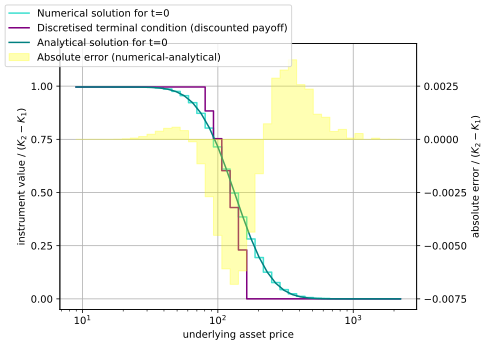

HTML(value="<a href='.\\tmpjuo7456w.pdf' target='_blank'>.\\tmpjuo7456w.pdf</a><br>")

In [12]:
fig, ax1 = pyplot.subplots()
yscl = 1 / (settings.K2 - settings.K1)
ax2 = pyplot.twinx()
ax2.fill_between(S, yscl*(psi_0-psi_a), step="mid", label='Absolute error (numerical-analytical)', alpha=.3, color='yellow')
ax2.set_ylabel("absolute error / ($K_2-K_1$)")
ax1.step(S, yscl*psi_0, where='mid', label='Numerical solution for t=0', color=colors[2])
ax1.step(S, yscl*psi_T, where='mid', label="Discretised terminal condition (discounted payoff)", color=colors[0])
ax1.plot(S, yscl*psi_a, label='Analytical solution for t=0', color=colors[1])
ax1.set_xscale("log")
ax1.grid()
ax1.set_xlabel("underlying asset price")
ax1.set_ylabel("instrument value / ($K_2-K_1$)")
ax1.set_ylim((-.05, 1.2))
ax1.set_yticks(np.arange(0, 1.25, 0.25))
ax2.set_ylim((-.008,.0045))
ax2.set_yticks(np.arange(-.0075, .005, .0025))
fig.legend(loc='upper left')
show_plot()

In [13]:
scl = settings.K2 - settings.K1
np.testing.assert_almost_equal(np.amax(psi_0 / scl), 1, decimal=2)

In [14]:
scl = settings.K2 - settings.K1
np.testing.assert_almost_equal(np.amin(psi_0 / scl), 0, decimal=14)

In [15]:
abserr = psi_0 - psi_a
maxabserr = np.amax(np.abs(abserr))
assert np.abs(abserr[0]) < .0001 * maxabserr
assert np.abs(abserr[-1]) < .001 * maxabserr
assert maxabserr < .75